In [28]:
# Basic data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
# Plotting Predicted vs Actual values
def plot_predicted_vs_actual(y_true, y_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, edgecolor='k', alpha=0.7)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()

def plot_predicted_vs_actual_with_jitter(y_true, y_pred, jitter_amount=0.02):
    # Adding jitter: add normally distributed noise to both y_true and y_pred
    jitter_y_true = y_true + np.random.normal(0, jitter_amount, y_true.shape)
    jitter_y_pred = y_pred + np.random.normal(0, jitter_amount, y_pred.shape)

    plt.figure(figsize=(10, 6))
    plt.scatter(jitter_y_true, jitter_y_pred, edgecolor='k', alpha=0.7)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Predicted vs. Actual Values with Jitter')
    plt.grid(True)
    plt.show()

# models
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression

# Data preprocessing
from sklearn.preprocessing import StandardScaler


# Model evaluation and metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)

def custom_accuracy_within_one_class(y_true, y_pred):
    correct = np.sum(np.abs(y_true - y_pred) <= 1)
    total = len(y_true)
    return correct / total


def plot_confusion_matrix(y_true, y_pred):
    """
    Plots a simple confusion matrix with minimal configuration.
    """
    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()  # Adds a colorbar to show the scale
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix_with_histograms(y_true, y_pred):
    """
    Plots a confusion matrix with histograms for true and predicted label distributions.
    """
    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    num_classes = cm.shape[0]
    
    # Create the main figure and axes
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Positioning of the main confusion matrix plot
    main_ax = plt.subplot2grid((num_classes+1, num_classes+1), (1, 0), colspan=num_classes, rowspan=num_classes)
    main_ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    
    # Plot the histograms for the rows (True Labels)
    for i in range(num_classes):
        ax_row_hist = plt.subplot2grid((num_classes+1, num_classes+1), (1+i, num_classes))
        ax_row_hist.barh([0], [np.sum(cm[i, :])], color="blue", align='center')
        ax_row_hist.set_xlim(0, np.max(np.sum(cm, axis=1)) * 1.1)  # slightly larger to accommodate all bars
        ax_row_hist.set_yticks([])
        ax_row_hist.set_xticks([])

    # Plot the histograms for the columns (Predicted Labels)
    for j in range(num_classes):
        ax_col_hist = plt.subplot2grid((num_classes+1, num_classes+1), (num_classes, j))
        ax_col_hist.bar([0], [np.sum(cm[:, j])], color="blue", align='center')
        ax_col_hist.set_ylim(0, np.max(np.sum(cm, axis=0)) * 1.1)  # slightly larger to accommodate all bars
        ax_col_hist.set_xticks([])
        ax_col_hist.set_yticks([])

    # Labeling and showing the plot
    main_ax.set_title('Confusion Matrix with Histograms')
    main_ax.set_xlabel('Predicted label')
    main_ax.set_ylabel('True label')
    plt.tight_layout()
    plt.show()


def classify_linear_probability(data):
    # Calculate mean and standard deviation
    mean = data.mean()
    std = data.std()
    
    # Define cutoffs based on your specification
    cutoffs = [
        mean - 2 * std,
        mean - 1.5 * std,
        mean - std,
        mean - (1/3) * std,
        mean + (1/3) * std,
        mean + std,
        mean + 1.5 * std,
        mean + 2 * std
    ]
    
    # Use pandas.cut to categorize the data
    categories = pd.cut(data, bins=[-np.inf] + cutoffs + [np.inf], labels=[1, 2, 3, 4, 5, 6, 7, 8, 9])    


    return categories.codes

def get_model_performance(y,y_pred, plot = False):

    rmse = np.sqrt(mean_squared_error(y, y_pred))
    r_2 = r2_score(y, y_pred)
    within_1 = custom_accuracy_within_one_class(y, y_pred)

    # print("Mean Absolute Error (MAE):", mean_absolute_error(y_train, y_pred_train))
    # print("Mean Squared Error (MSE):", mean_squared_error(y_train, y_pred_train))
    print("Root Mean Squared Error (RMSE):", rmse)
    print("R-squared (R²):", r_2)
    print("Within 1:", within_1)

    if plot:
        try:
            plot_confusion_matrix_with_histograms(y, y_pred)
        except ValueError:
            plot_predicted_vs_actual(y,y_pred)

    return rmse, r_2, within_1
    

enable %%R cells in the notebook (mostly for vizualisation)

In [31]:
%load_ext rpy2.ipython

In [11]:
# Initialize dictionaries for model metrics
performance_train = {}
performance_test = {}

In [13]:
from rural_beauty.config import predictors_DE


predictors = pd.read_csv(predictors_DE, sep=",",  index_col=False, na_values = -99)

predictors = predictors.drop('hemero_1', axis = 1)

predictors.tail(5)

,dem_1_2,dem_3-4,obst_1_4,wald_1_4,natgru_2,acker_1_4,stoer_1,stoer_2,stoer_3,noveg_2,seemee_1,spfr_1,heide_1,weanl_1_4,stra_1_2,leit_1
9995,10.717214,13.625498,0.0,0.164822,0.0,0.624444,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.134426,322.67944,0.0
9996,82.921540,91.394950,0.0,0.317341,0.0,0.322107,0.0,0.000000,0.015271,0.0,0.0,0.0,0.0,0.059016,0.00000,0.0
9997,10.654134,16.808640,0.0,0.032016,0.0,0.747426,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.072131,668.53760,0.0
9998,30.581434,36.161990,0.0,0.233513,0.0,0.446322,0.0,0.017822,0.022275,0.0,0.0,0.0,0.0,0.000000,997.44460,0.0
9999,120.383810,101.669785,0.0,0.293307,0.0,0.379008,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.114754,187.55359,0.0


Now the left hand side

In [14]:
from rural_beauty.config import beauty_DE
outcome = pd.read_csv(beauty_DE, sep=",",  index_col=False, na_values = -99)
outcome.tail(5)

,schoen
9995,4
9996,5
9997,4
9998,4
9999,6


Split the Dataset

In [15]:
X    = predictors
Y    = outcome
feat = predictors.columns.values
print(X.shape)
print(Y.shape)

(10000, 16)
(10000, 1)


In [16]:
# Find rows with NaN values in X
na_rows_X = X.apply(lambda x: np.any(pd.isna(x)), axis=1)
resultx = np.where(na_rows_X)[0]

# Find rows with NaN values in Y
na_rows_Y = Y.apply(lambda x: np.any(pd.isna(x)), axis=1)
resulty = np.where(na_rows_Y)[0]

# Combine the results
result = list(set(resulty).union(set(resultx)))

print('NA rows: ' + str(result))

NA rows: []


In [17]:
X = X.drop(X.index[result])
Y = Y.drop(Y.index[result])

print(X.shape)
print(Y.shape)

(10000, 16)
(10000, 1)


Create 4 dataset for training and testing the algorithm 

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=2024, stratify = Y)
y_train = np.ravel(Y_train)
y_test = np.ravel(Y_test)

In [19]:
# Normalizing the data
scaler_X = StandardScaler()
scaler_Y = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
Y_train = scaler_Y.fit_transform(Y_train.values.reshape(-1, 1)).ravel()
Y_test = scaler_Y.transform(Y_test.values.reshape(-1, 1)).ravel()

In [20]:
rfCla = RandomForestClassifier(max_depth=10,min_samples_split= 20, oob_score = True) 
rfCla.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=20, oob_score=True)

In [21]:
# Make predictions
y_pred_train = rfCla.predict(X_train)
y_pred_test = rfCla.predict(X_test)

print("Random Forest Classification: Training Set Performance")
performance_train['RFC'] = get_model_performance(y_train, y_pred_train)

print("---------------------------------------------")

print("Random Forest Classification: Test Set Performance")
performance_test['RFC'] = get_model_performance(y_train, y_pred_train)

Random Forest Classification: Training Set Performance
Root Mean Squared Error (RMSE): 0.6708203932499369
R-squared (R²): 0.7935503893768114
Within 1: 0.9602
---------------------------------------------
Random Forest Classification: Test Set Performance
Root Mean Squared Error (RMSE): 0.6708203932499369
R-squared (R²): 0.7935503893768114
Within 1: 0.9602


In [77]:
# now a linear regression 

In [22]:
linReg = LinearRegression()
linReg.fit(X_train, y_train)

# Retrieve the estimated coefficients
coefficients = pd.DataFrame({
    'Feature': predictors.columns,
    'Coefficient': linReg.coef_
})

coefficients = coefficients.sort_values(by = 'Coefficient', key = lambda x: abs(x), ascending = False) 

# If you also need the intercept:
intercept = linReg.intercept_

print("Intercept:", intercept)
print(coefficients.round(4))


Intercept: 4.9444
      Feature  Coefficient
0     dem_1_2       0.4690
5   acker_1_4      -0.3384
6     stoer_1      -0.3325
1     dem_3-4       0.2303
3    wald_1_4       0.2248
14   stra_1_2      -0.1982
9     noveg_2      -0.1563
10   seemee_1       0.1494
15     leit_1      -0.1239
8     stoer_3      -0.1174
12    heide_1       0.1167
11     spfr_1      -0.0931
7     stoer_2      -0.0862
2    obst_1_4       0.0624
13  weanl_1_4      -0.0341
4    natgru_2       0.0208


In [23]:
# Make predictions
y_pred_train = linReg.predict(X_train)
y_pred_test = linReg.predict(X_test)

print("Linear Probability: Training Set Performance")
performance_train['LMR'] = get_model_performance(y_train, y_pred_train)
print("---------------------------------------------")
print("Linear Probability: Test Set Performance")
performance_test['LMR'] = get_model_performance(y_test, y_pred_test)

Linear Probability: Training Set Performance
Root Mean Squared Error (RMSE): 0.7007389889514637
R-squared (R²): 0.7747244188394282
Within 1: 0.876
---------------------------------------------
Linear Probability: Test Set Performance
Root Mean Squared Error (RMSE): 0.7578565216360593
R-squared (R²): 0.736104052529858
Within 1: 0.8708


In [91]:
# now classify them like they did in the paper

In [24]:
y_pred_train = linReg.predict(X_train)
y_pred_test = linReg.predict(X_test)

y_pred_train_class = classify_linear_probability(y_pred_train)
y_pred_test_class = classify_linear_probability(y_pred_test)

print("Linear Probability Sigma Binning: Training Set Performance")
performance_train['LMC'] = get_model_performance(y_train, y_pred_train_class)
print("---------------------------------------------")
print("Linear Probability Sigma Binning: Test Set Performance")
performance_test['LMC'] = get_model_performance(y_test, y_pred_test_class)

Linear Probability Sigma Binning: Training Set Performance
Root Mean Squared Error (RMSE): 1.2076423311560422
R-squared (R²): 0.33091975081587055
Within 1: 0.8142
---------------------------------------------
Linear Probability Sigma Binning: Test Set Performance
Root Mean Squared Error (RMSE): 1.2109500402576483
R-squared (R²): 0.3262307467816904
Within 1: 0.8188


In [25]:
print("Training Set Performance:")
for model, metrics in performance_train.items():
    rmse, r_squared, within_1 = metrics
    print(f"Model: {model}")
    print(f"RMSE: {rmse:.2f}, R^2: {100*r_squared:.2f}%, Within 1 Class: {100*within_1:.2f}%")

print("Testing Set Performance:")
for model, metrics in performance_test.items():
    rmse, r_squared, within_1 = metrics
    print(f"Model: {model}")
    print(f"RMSE: {rmse:.2f}, R^2: {100*r_squared:.2f}%, Within 1 Class: {100*within_1:.2f}%")

Training Set Performance:
Model: RFC
RMSE: 0.67, R^2: 79.36%, Within 1 Class: 96.02%
Model: LMR
RMSE: 0.70, R^2: 77.47%, Within 1 Class: 87.60%
Model: LMC
RMSE: 1.21, R^2: 33.09%, Within 1 Class: 81.42%
Testing Set Performance:
Model: RFC
RMSE: 0.67, R^2: 79.36%, Within 1 Class: 96.02%
Model: LMR
RMSE: 0.76, R^2: 73.61%, Within 1 Class: 87.08%
Model: LMC
RMSE: 1.21, R^2: 32.62%, Within 1 Class: 81.88%


In addition: Warning message:
In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/local/lib/R/site-library’ contains no packages


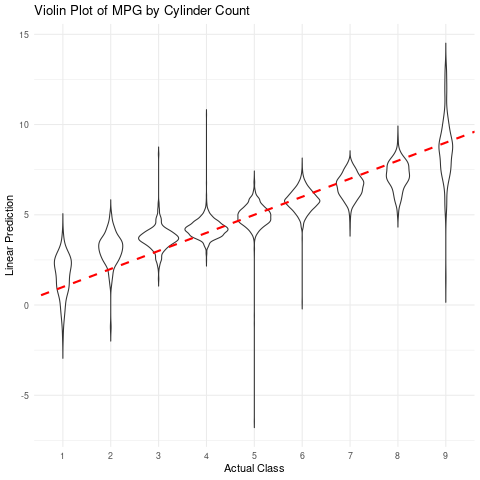

In [32]:
%%R -i y_test,y_pred_test,y_pred_test_class

d <- data.frame(y_test, y_pred_test, y_pred_test_class)

library(ggplot2)
ggplot(d, aes(factor(y_test), y_pred_test)) +
  geom_violin(trim=FALSE) +
  labs(title="Violin Plot of MPG by Cylinder Count",
       x="Actual Class",
       y="Linear Prediction") +
  geom_abline(slope=1, intercept=0, color="red", linetype="dashed", size=1) +
  theme_minimal()


In [33]:
from matplotlib.colors import ListedColormap

def plot_predicted_vs_actual_colored(y_true, y_pred, categories):
    # Create a colormap from green to blue
    cmap = ListedColormap(np.linspace([0, 1, 0], [0, 0, 1], 9))  # Ramping from green to blue

    plt.figure(figsize=(10, 6))
    
    # Scatter plot with colors based on 'categories'
    scatter = plt.scatter(y_true, y_pred, c=categories, cmap=cmap, edgecolor='k', alpha=0.7)
    
    # Adding a colorbar
    plt.colorbar(scatter, label='Category')
    
    # Plot the line of perfect prediction
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Predicted vs. Actual Values')
    plt.show()

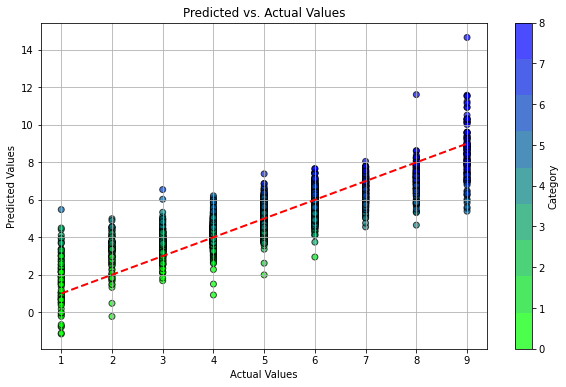

In [129]:
plot_predicted_vs_actual(y_test,y_pred_test,y_pred_test_class)